In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)


local
local
stop final relax at some point


In [2]:
%load_ext pyinstrument

stop final relax at some point
0.5
Generation 0, Trees 2, Best cost: 0.00794731, Est: 0.39736536, h: 0.628993
[[0.6289929]]


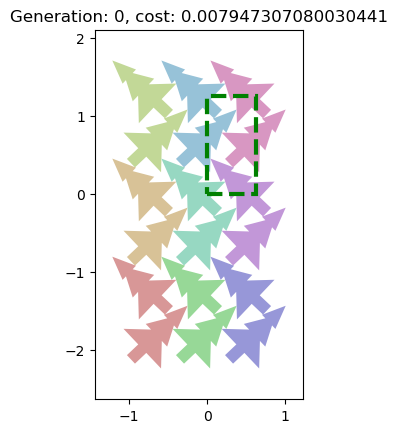

Generation 1, Trees 2, Best cost: 0.00649047, Est: 0.32452360, h: 0.568186
[[0.56818604]]


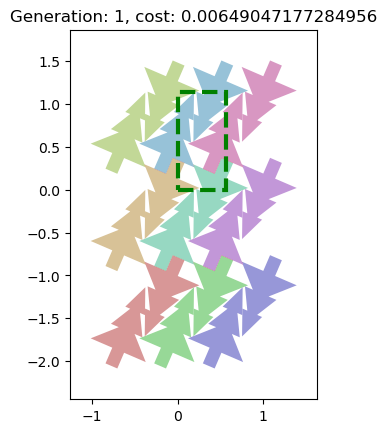

Generation 2, Trees 2, Best cost: 0.00649038, Est: 0.32451907, h: 0.568194
[[0.56819403]]


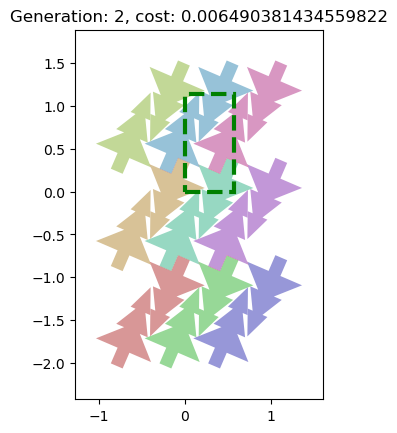

Generation 3, Trees 2, Best cost: 0.00649037, Est: 0.32451850, h: 0.568185
[[0.56818515]]


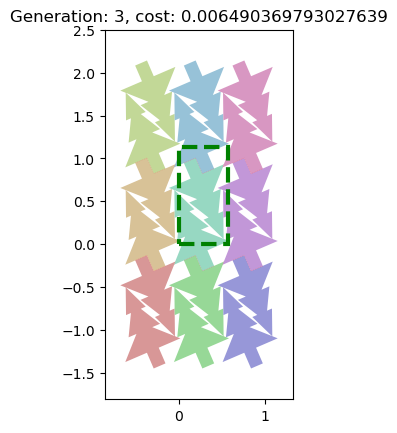

Generation 4, Trees 2, Best cost: 0.00649037, Est: 0.32451850, h: 0.568185
[[0.56818515]]
0.6
Generation 0, Trees 2, Best cost: 0.00762097, Est: 0.38104850, h: 0.673573
[[0.6735734]]


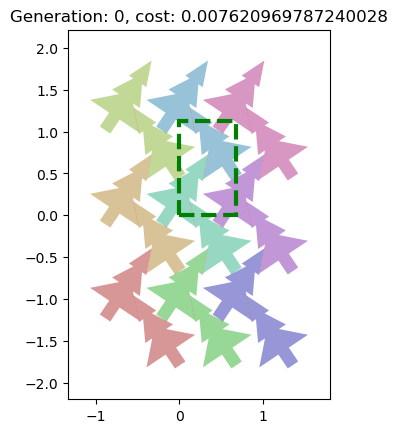

Generation 1, Trees 2, Best cost: 0.00621775, Est: 0.31088743, h: 0.609731
[[0.609731]]


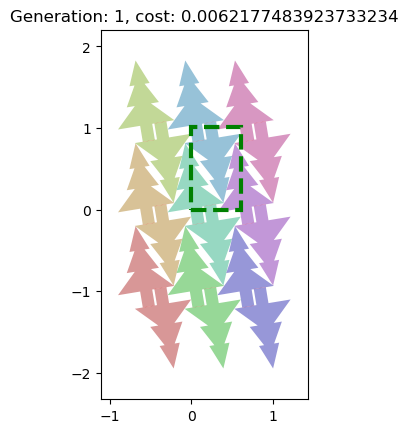

Generation 2, Trees 2, Best cost: 0.00621774, Est: 0.31088686, h: 0.609704
[[0.60970396]]


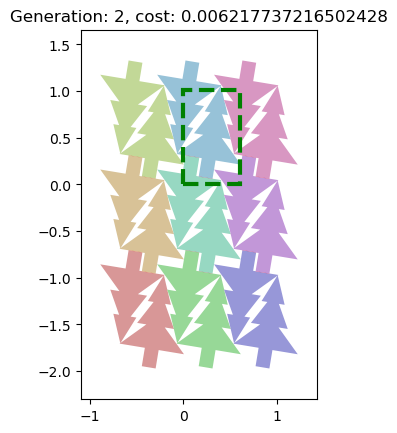

Generation 3, Trees 2, Best cost: 0.00621774, Est: 0.31088683, h: 0.609697
[[0.6096969]]


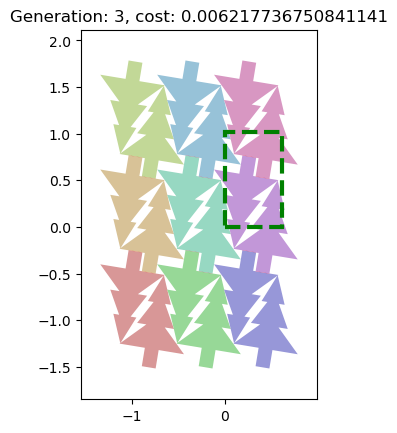

Generation 4, Trees 2, Best cost: 0.00621774, Est: 0.31088677, h: 0.609693
[[0.6096931]]


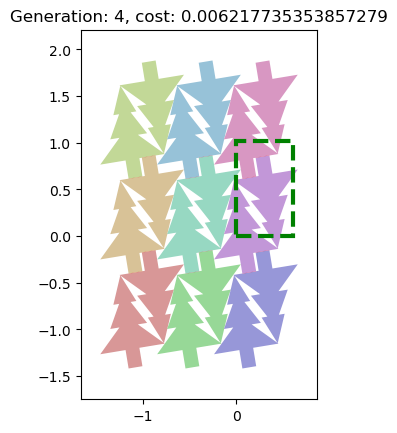

0.7
Generation 0, Trees 2, Best cost: 0.00778150, Est: 0.38907498, h: 0.735799
[[0.73579943]]


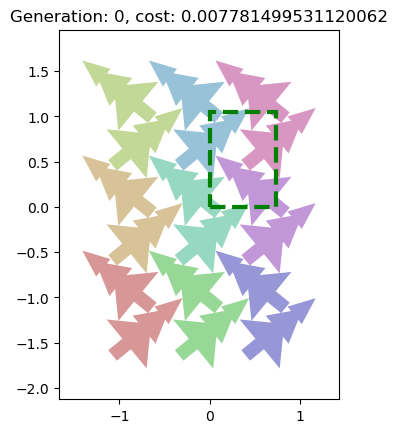

Generation 1, Trees 2, Best cost: 0.00634455, Est: 0.31722739, h: 0.665343
[[0.6653427]]


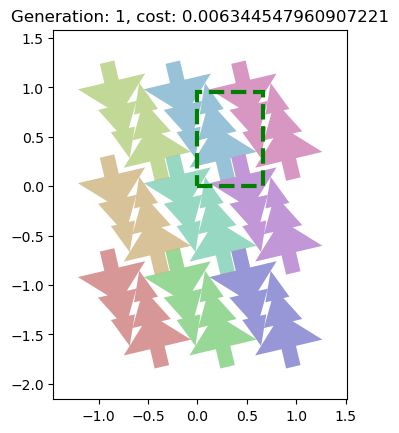

Generation 2, Trees 2, Best cost: 0.00634453, Est: 0.31722668, h: 0.665315
[[0.6653149]]


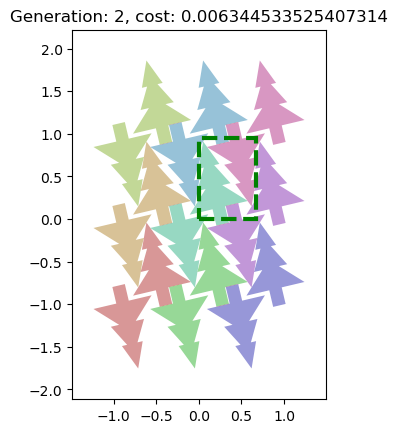

Generation 3, Trees 2, Best cost: 0.00634453, Est: 0.31722662, h: 0.665308
[[0.6653079]]


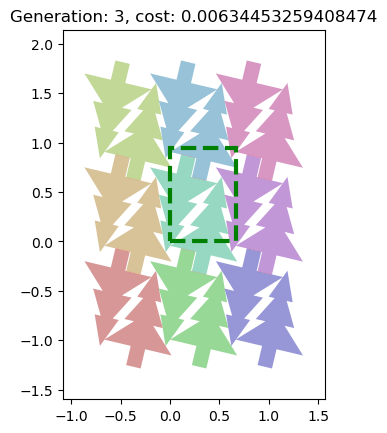

Generation 4, Trees 2, Best cost: 0.00634453, Est: 0.31722662, h: 0.665308
[[0.6653079]]
0.7999999999999999
Generation 0, Trees 2, Best cost: 0.00784373, Est: 0.39218649, h: 0.788388
[[0.78838843]]


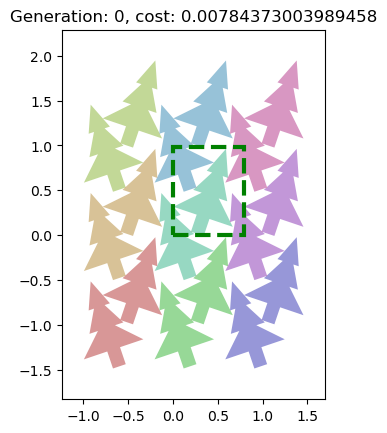

Generation 1, Trees 2, Best cost: 0.00645817, Est: 0.32290855, h: 0.717532
[[0.7175315]]


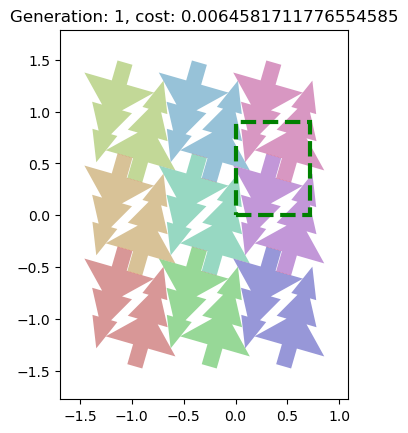

Generation 2, Trees 2, Best cost: 0.00645817, Est: 0.32290846, h: 0.717522
[[0.71752244]]


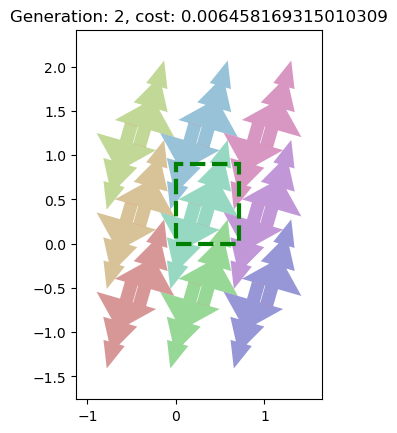

Generation 3, Trees 2, Best cost: 0.00645817, Est: 0.32290843, h: 0.717535
[[0.71753484]]


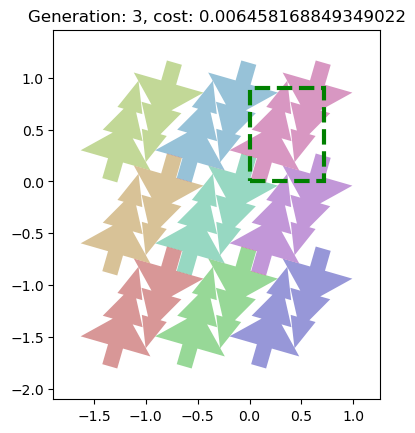

Generation 4, Trees 2, Best cost: 0.00645817, Est: 0.32290840, h: 0.717523
[[0.717523]]


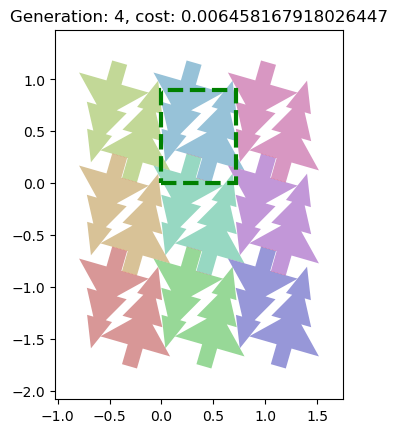

0.8999999999999999
Generation 0, Trees 2, Best cost: 0.00712314, Est: 0.35615721, h: 0.797971
[[0.79797065]]


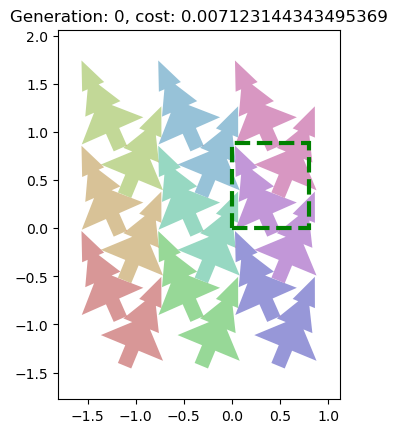

Generation 1, Trees 2, Best cost: 0.00658123, Est: 0.32906166, h: 0.768272
[[0.76827204]]


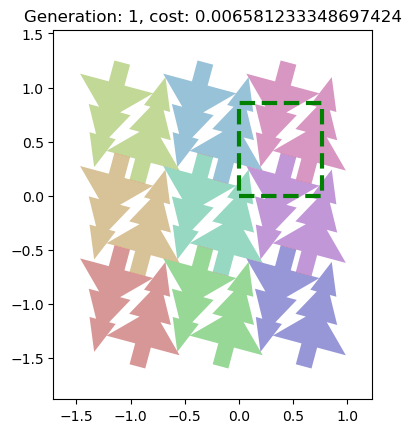

Generation 2, Trees 2, Best cost: 0.00658123, Est: 0.32906154, h: 0.768253
[[0.7682529]]


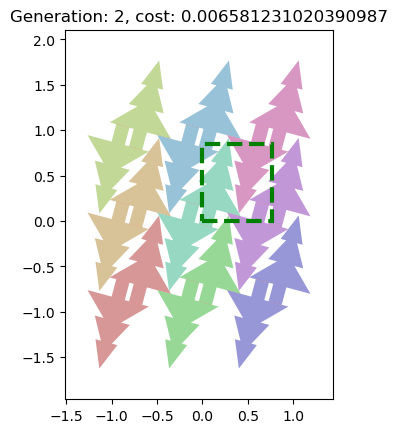

Generation 3, Trees 2, Best cost: 0.00658123, Est: 0.32906154, h: 0.768253
[[0.7682529]]
Generation 4, Trees 2, Best cost: 0.00658123, Est: 0.32906154, h: 0.768250
[[0.76825005]]


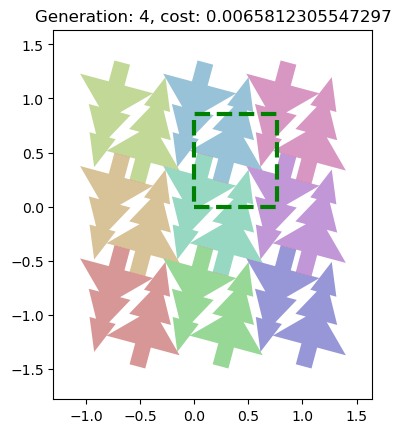

0.9999999999999999
Generation 0, Trees 2, Best cost: 0.00667184, Est: 0.33359206, h: 0.815175
[[0.81517464]]


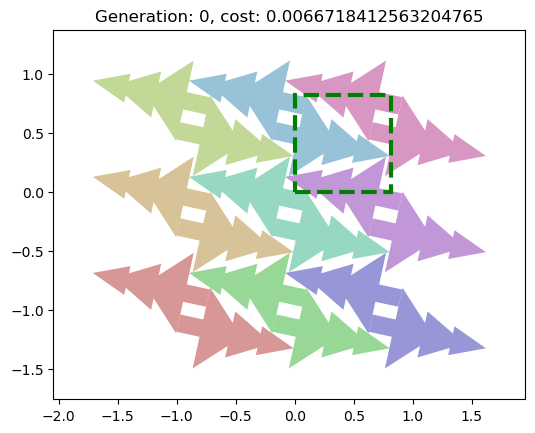

Generation 1, Trees 2, Best cost: 0.00663947, Est: 0.33197349, h: 0.813958
[[0.8139576]]


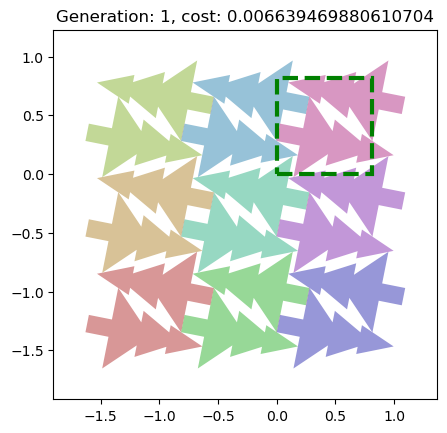

Generation 2, Trees 2, Best cost: 0.00663947, Est: 0.33197328, h: 0.813952
[[0.8139518]]


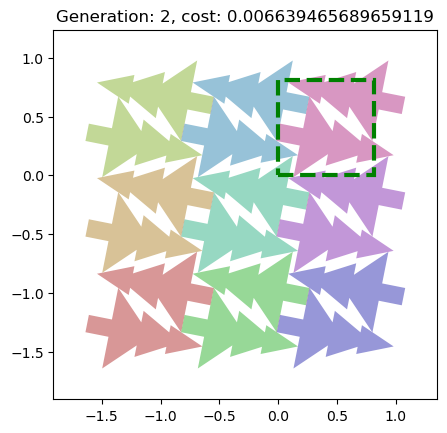

Generation 3, Trees 2, Best cost: 0.00663947, Est: 0.33197325, h: 0.813956
[[0.81395644]]


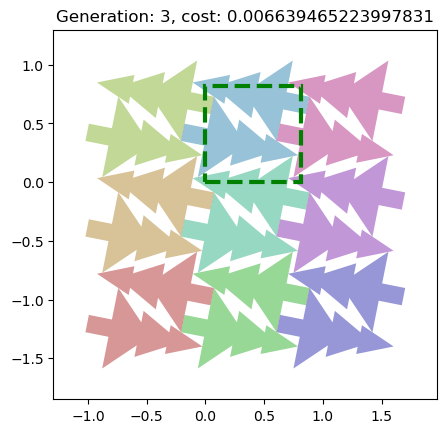

Generation 4, Trees 2, Best cost: 0.00663946, Est: 0.33197322, h: 0.813956
[[0.81395596]]


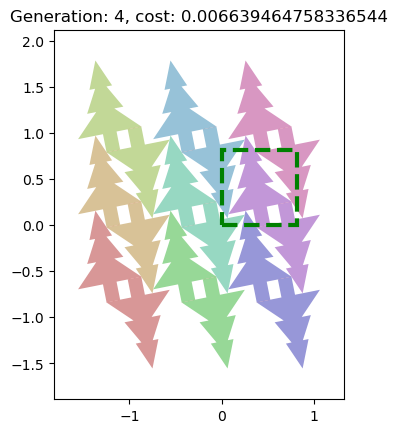

In [3]:
importlib.reload(pack_ga)
fastMode = False

# fast for now
#runner.population_size = 1
#runner.selection_size = [0]
#runner.n_generations = 500

# structural
ratios = np.arange(0.5,1.01,0.1)
res = []
for r in ratios:
    print(r)
    runner = pack_ga.GA()
    runner.N_trees_to_do = np.array([2])
    runner.population_size = 1000
    runner.plot_fitness_predictors = False
    runner.plot_diversity_matrix = False
    runner.plot_champions = True
    runner.initializer.base_solution = kgs.SolutionCollectionLatticeFixed()
    runner.initializer.base_solution.aspect_ratios = cp.array([1/r], dtype=kgs.dtype_cp)
    runner.initializer.jiggler.duration_init = 0.
    runner.initializer.jiggler.duration_compact /= 100000
    runner.initializer.jiggler.duration_final = 0.
    runner.initializer.jiggler.plot_interval = None
    runner.initializer.jiggler.n_rounds = 1
    runner.rough_relaxers[0].plot_interval =None
    runner.rough_relaxers[0].n_iterations//=5
    runner.fine_relaxers[0].plot_interval=None
    runner.rough_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].n_iterations//=5
    runner.n_generations = 5
    runner.fitness_cost.costs.pop(1)
    kgs.debugging_mode = 1
    kgs.profiling=False
    new_moves = []
    for i in [1,2]:
        new_moves.append(runner.move.moves[i])
    runner.move.moves = new_moves
    #print(runner.move.moves)
    #runner.rough_relaxers = []
    #runner.fine_relaxers = []
    runner.run()
    res.append(runner)

In [4]:
runner.rough_relaxers[0].cost

CostCompound(comment='', scaling=1.0, costs=[AreaCost(comment='', scaling=0.01), CollisionCostOverlappingArea(comment='', scaling=1.0)])